In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

In [2]:
labels = os.listdir("train")

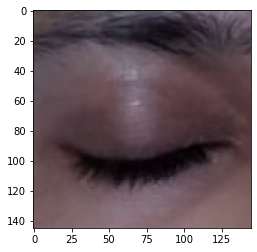

In [3]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("train/Closed/_0.jpg"))

In [4]:
def get_data(dir_path="train", face_cas="haarcascade_frontalface_default.xml", eye_cas="haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [5]:
data_train = get_data()

2
3


In [6]:
data_train[0]

[array([[[ 77,  77,  93],
         [ 75,  75,  91],
         [ 72,  72,  88],
         ...,
         [140, 123, 136],
         [134, 117, 130],
         [133, 119, 131]],
 
        [[ 79,  79,  95],
         [ 78,  78,  94],
         [ 75,  75,  91],
         ...,
         [126, 109, 122],
         [125, 108, 121],
         [123, 109, 121]],
 
        [[ 79,  80,  94],
         [ 79,  80,  94],
         [ 77,  77,  93],
         ...,
         [120, 103, 116],
         [116,  99, 112],
         [118, 104, 116]],
 
        ...,
 
        [[ 96,  92, 121],
         [ 96,  92, 121],
         [ 95,  91, 120],
         ...,
         [101, 101, 131],
         [102, 102, 132],
         [101, 101, 131]],
 
        [[ 96,  92, 121],
         [ 96,  92, 121],
         [ 97,  93, 122],
         ...,
         [102, 102, 132],
         [102, 102, 132],
         [ 99,  99, 129]],
 
        [[ 97,  92, 121],
         [ 96,  91, 120],
         [ 98,  93, 122],
         ...,
         [100, 103, 131],
  

In [7]:
X = []
y = []
for feature, label in data_train:
    X.append(feature)
    y.append(label)

In [8]:
X = np.array(X)

In [9]:
X = (X.reshape(X.shape[0], X.shape[1] * X.shape[2] * X.shape[3]))

In [10]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [11]:
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [13]:
len(X_test)

436

In [14]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [32]:
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

In [16]:
#use LogisticRegression model
lr = LogisticRegression()
lr.fit(X_train,y_train)
predlr = lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predlr))
print('\n')
print(classification_report(y_test, predlr))
lr.score(X_test,y_test)

[[211  12]
 [  9 204]]


              precision    recall  f1-score   support

           0       0.96      0.95      0.95       223
           1       0.94      0.96      0.95       213

    accuracy                           0.95       436
   macro avg       0.95      0.95      0.95       436
weighted avg       0.95      0.95      0.95       436



0.9518348623853211

In [18]:
#use SVM model:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
predsvm=clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [19]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsvm))
print('\n')
print(classification_report(y_test, predsvm))
clf.score(X_test,y_test)

[[208  15]
 [ 12 201]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       223
           1       0.93      0.94      0.94       213

    accuracy                           0.94       436
   macro avg       0.94      0.94      0.94       436
weighted avg       0.94      0.94      0.94       436



0.9380733944954128

In [34]:
#use KNN model
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
predsknn=neigh.predict(X_test)

<ipython-input-34-7d7422c92833>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train, y_train)


In [35]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsknn))
print('\n')
print(classification_report(y_test, predsknn))
neigh.score(X_test,y_test)

[[198  25]
 [ 62 151]]


              precision    recall  f1-score   support

           0       0.76      0.89      0.82       223
           1       0.86      0.71      0.78       213

    accuracy                           0.80       436
   macro avg       0.81      0.80      0.80       436
weighted avg       0.81      0.80      0.80       436



0.8004587155963303

In [20]:
y_train

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [21]:
IMG_SIZE = 145
def prepare(filepath, face_cas="haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    X = np.array(resized_array)
    X = (X.reshape(X.shape[0] * X.shape[1] * X.shape[2]))
    return X

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load two xml files for face recognition and eye recognition
face_xml = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_xml = cv2.CascadeClassifier('haarcascade_eye.xml')

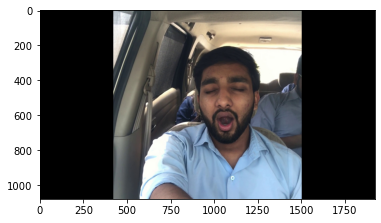

In [3]:
test_IMG = 'DATASET/4639.jpg'
test_img = plt.imread(test_IMG)
plt.imshow(test_img)
plt.show()

In [4]:
# Grayscale processing
test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

In [5]:
# face recognition
face = face_xml.detectMultiScale(test_gray, 1.3, 2)  # Parameters: 1. Grayscale image, 2. Scaling, 3. Threshold
print("There are %d faces in this image" % len(face))

There are 2 faces in this image


In [6]:
import PIL.Image
import os

In [8]:
eye_prediction = []

There are 3 eyes on this face
[[ 70 124  98  98]
 [210 110  99  99]
 [246 108 106 106]]
There are 0 eyes on this face
()


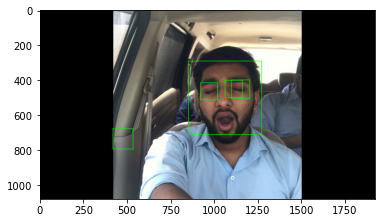

In [7]:
# Draw the recognized face
for (x, y, w, h) in face:
    cv2.rectangle(test_img, (x, y), (x+w, y+h), (0, 255, 0), 2)  # draw face box
    plt.imshow(test_img)
#     cv2.waitkey(0)
    # Identify eyes on the basis of faces
    face_gray = test_gray[y:y+h, x:x+w]
    face_color = test_img[y:y+h, x:x+w]
    # eye recognition
    eyes = eye_xml.detectMultiScale(face_gray)
    print("There are %d eyes on this face" % len(eyes))
    print(eyes)
    #Save the recognized image
    im = PIL.Image.open(test_IMG)  # Open an image with PIL
    for i in range(len(eyes)):
        if eyes[i][2]>70:
            if eyes[i][0]>240 or eyes[i][0]<80:
                box = (face[0][0]+eyes[i][0], face[0][1]+eyes[i][1], face[0][0]+eyes[i][0]+eyes[i][2], face[0][1]+eyes[i][1]+eyes[i][3])  # The box represents the position where the image needs to be cut. The format is: xmin ymin xmax ymax
                ng = im.crop(box)  # Crop im and save it as ng (im remains unchanged here)
                #save eye screenshot jpg
                ng.save('eye_test/copy'+str(i)+'.jpg')
                #Call jpg directly for prediction
                eye_p = np.argmax(clf.predict([prepare('eye_test/copy'+str(i)+'.jpg')]))
                eye_prediction.append(eye_p)
    # Draw the recognized eyes
    for (e_x, e_y, e_w, e_h) in eyes:
        cv2.rectangle(face_color, (e_x, e_y), (e_x+e_w, e_y+e_h), (0, 255, 0), 2)  # draw eye box

In [31]:
eye_prediction

[0, 0]